# Neccesarry Code for reproducing Figures 1/2 and ummary statistics from the FP04-Groundwater final presentation. 

In [1]:
# Import Neccessary libraries

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

## Datasets collected from the United States Drought Monitor

In [2]:
#Load United States Drought Dataset

droughts = open('../data/drought_monitor_data/dm_export.csv')
drought_data_US = pd.read_csv(droughts, parse_dates= ['MapDate'])
#Re-order data from oldest to newest
drought_data_US= drought_data_US[::-1]
#Establish mapdate as the index and drop its original column
drought_data_US.index = drought_data_US["MapDate"]
drought_data_US = drought_data_US.drop('MapDate', axis = 1)
drought_data_US

,AreaOfInterest,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
MapDate,,,,,,,,,,
2000-02-22,CONUS,43.35,56.65,30.72,10.95,0.00,0.00,2000-02-22,2000-02-28,1
2000-02-29,CONUS,45.46,54.54,32.56,14.07,0.00,0.00,2000-02-29,2000-03-06,1
2000-03-07,CONUS,45.92,54.08,32.17,15.08,0.00,0.00,2000-03-07,2000-03-13,1
2000-03-14,CONUS,51.59,48.41,30.55,16.07,0.00,0.00,2000-03-14,2000-03-20,1
2000-03-21,CONUS,52.02,47.98,29.82,15.63,0.00,0.00,2000-03-21,2000-03-27,1
...,...,...,...,...,...,...,...,...,...,...
2023-01-24,CONUS,37.08,62.92,42.99,21.67,7.48,1.78,2023-01-24,2023-01-30,1
2023-01-31,CONUS,38.41,61.59,42.65,21.39,7.42,1.74,2023-01-31,2023-02-06,1
2023-02-07,CONUS,39.70,60.30,41.88,19.62,6.33,1.77,2023-02-07,2023-02-13,1


In [3]:
#Load Colorado, USA Drought Dataset

droughts2 = open('../data/drought_monitor_data/dm_export_Colorado.csv')
drought_data_CO = pd.read_csv(droughts2, parse_dates= ['MapDate'])
#Re-order data from oldest to newest
drought_data_CO= drought_data_CO[::-1]
#Establish mapdate as the index and drop its original column
drought_data_CO.index = drought_data_CO["MapDate"]
drought_data_CO = drought_data_CO.drop('MapDate', axis = 1)
drought_data_CO

,StateAbbreviation,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
MapDate,,,,,,,,,,
2000-02-22,CO,93.06,6.94,0.09,0.00,0.00,0.00,2000-02-22,2000-02-28,1
2000-02-29,CO,92.00,8.00,1.20,0.00,0.00,0.00,2000-02-29,2000-03-06,1
2000-03-07,CO,93.52,6.48,0.00,0.00,0.00,0.00,2000-03-07,2000-03-13,1
2000-03-14,CO,96.57,3.43,0.00,0.00,0.00,0.00,2000-03-14,2000-03-20,1
2000-03-21,CO,97.06,2.94,0.00,0.00,0.00,0.00,2000-03-21,2000-03-27,1
...,...,...,...,...,...,...,...,...,...,...
2023-01-24,CO,43.18,56.82,35.58,11.18,1.87,0.04,2023-01-24,2023-01-30,1
2023-01-31,CO,45.65,54.35,35.58,11.18,1.87,0.04,2023-01-31,2023-02-06,1
2023-02-07,CO,41.33,58.67,37.42,12.29,1.99,0.16,2023-02-07,2023-02-13,1


## Figure 1 Construction

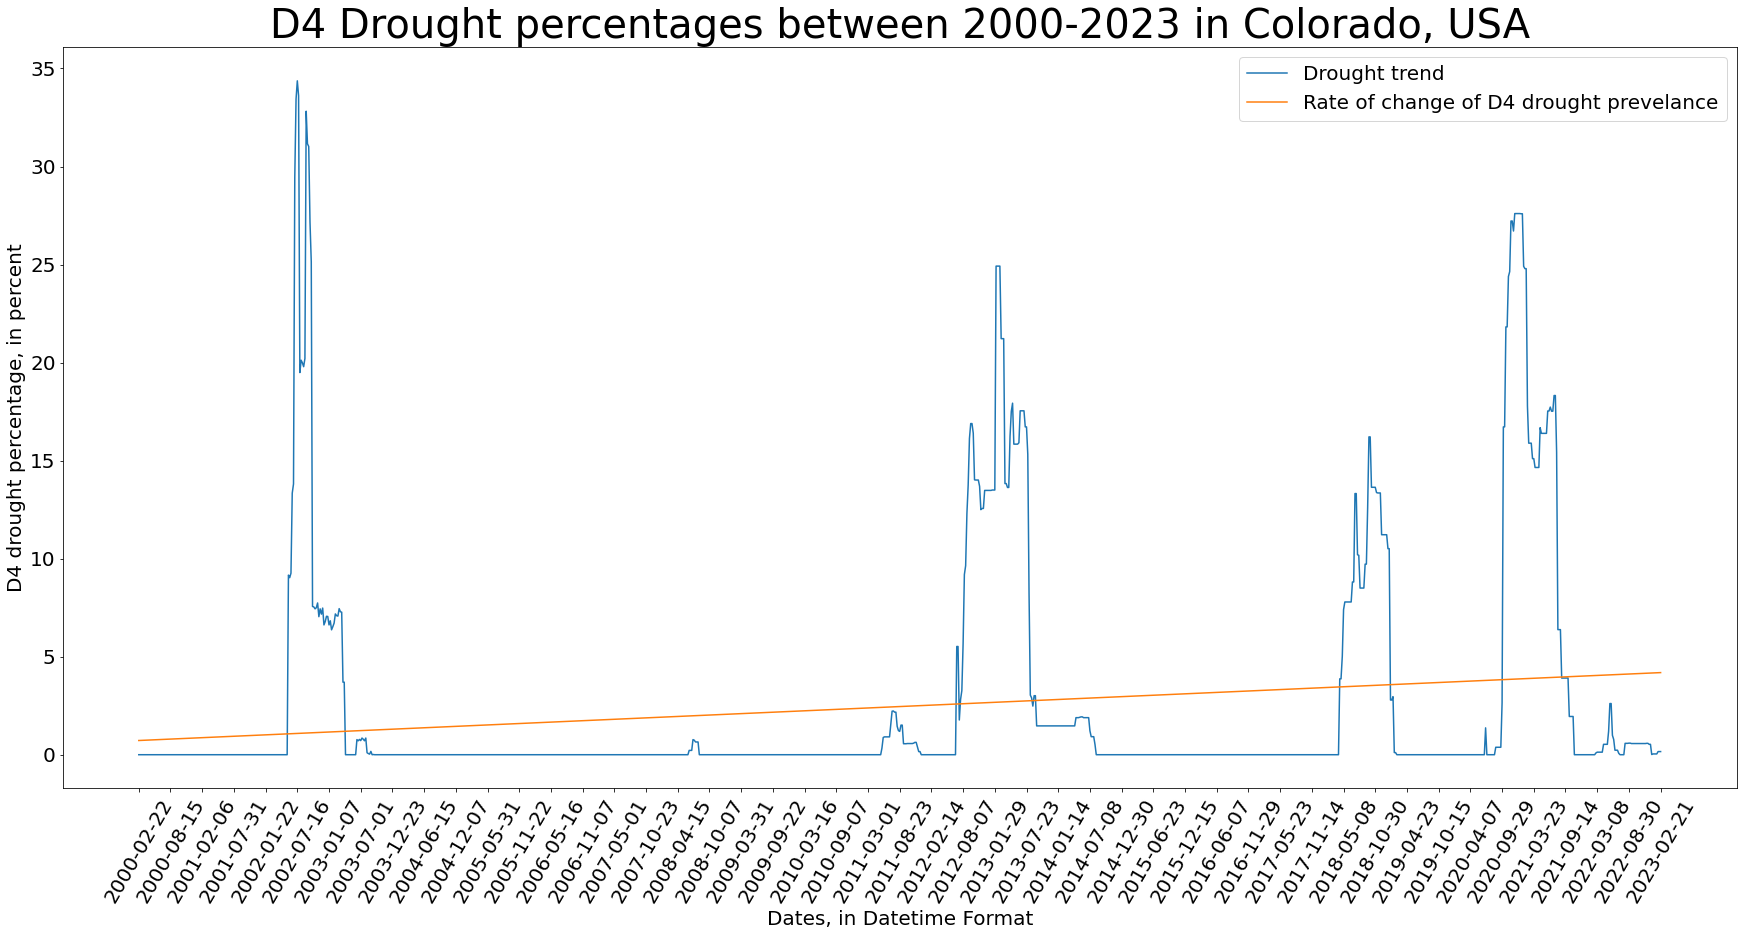

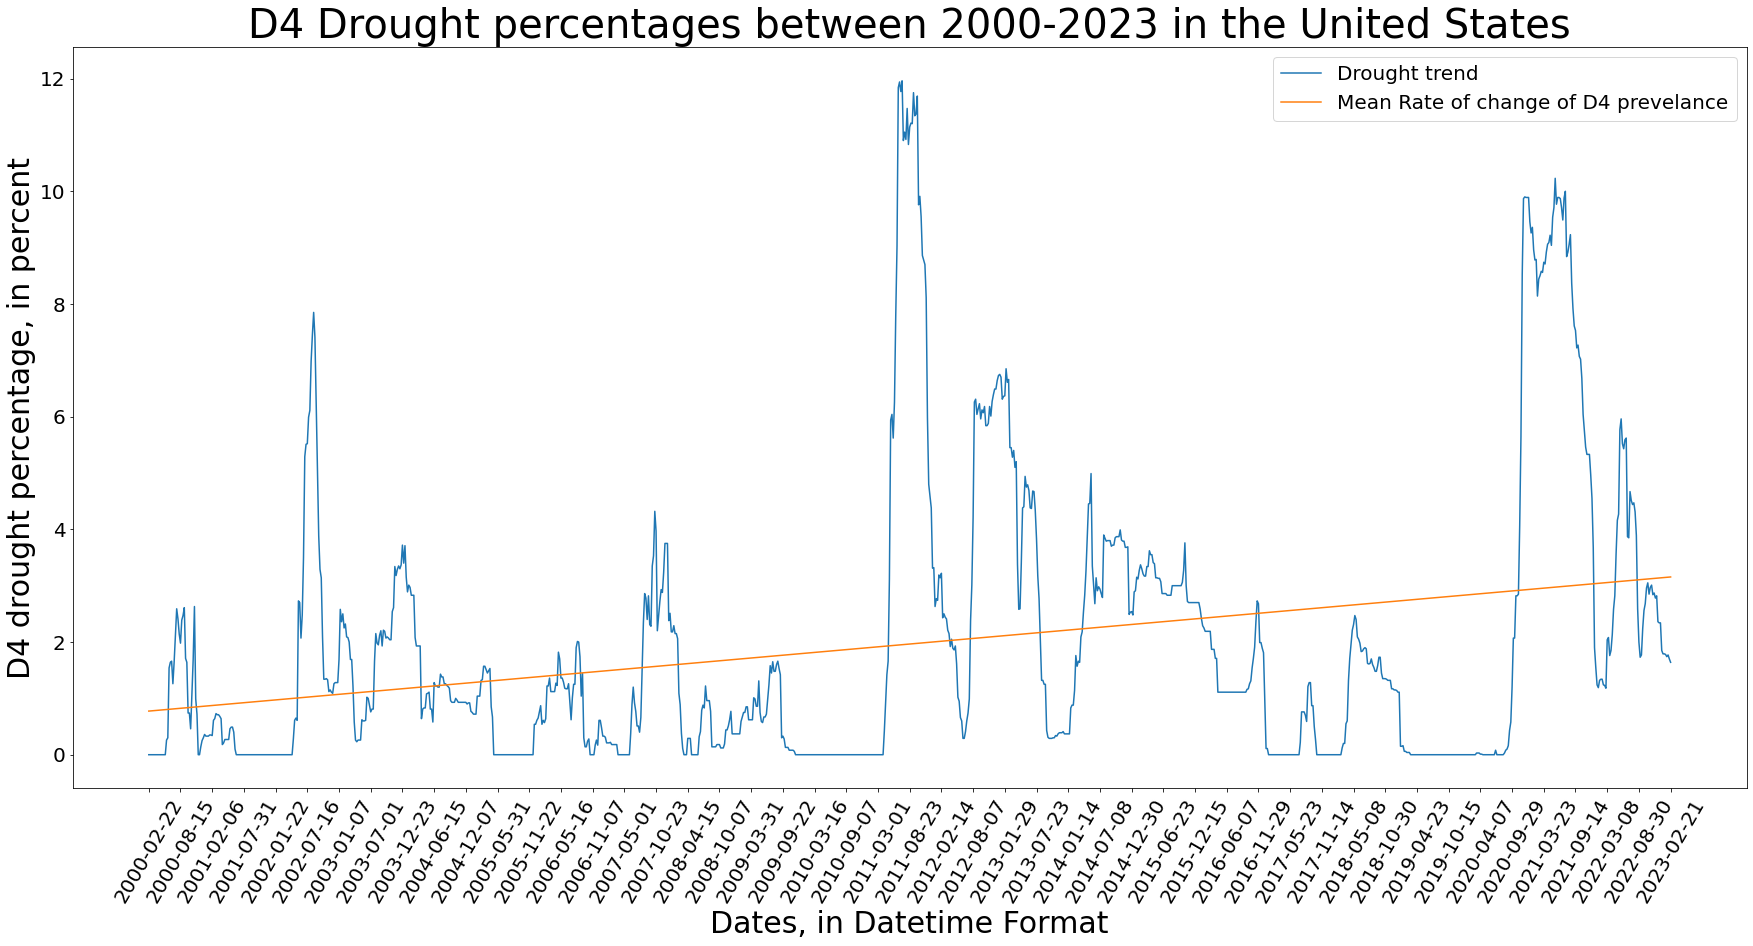

<Figure size 432x288 with 0 Axes>

In [6]:
#Convert the column in the Colorado Dataframe containing D4 drought values to a numpy array.
drought_data_arrCO = np.array(drought_data_CO['D4'].values)
#Create an array ranging from 0 to the length of the drought_data array and reshape it for linear fitting
x = np.array(np.arange(0,len(drought_data_arrCO)))
x = x.reshape(-1,1)
# Create a linear model based on x and the drought data array
lr = LinearRegression().fit(x,drought_data_arrCO)
#Create a figure and establish a 2x1 subplot
plt.figure(figsize=(30,30))
plt.subplot(211)
#Plot the drought data values as a function of the date indexes. Plot the trend in drought fluctuation by using the linear model to predict drought. 
plt.plot(drought_data_CO.index,drought_data_CO['D4']) 
plt.plot(drought_data_CO.index, lr.predict(x)) 
#Reformat the X ticks to prevent clogging of the dates. Increase the size of the yticks
plt.xticks(drought_data_CO.index[::25], rotation = 60, fontsize = 20)
plt.yticks(fontsize = 20)
# Title the plot and set x/y labels. Create a legend. 
plt.title('D4 Drought percentages between 2000-2023 in Colorado, USA', fontsize = 40)
plt.xlabel('Dates, in Datetime Format', fontsize = 20)
plt.ylabel('D4 drought percentage, in percent', fontsize = 20)
plt.legend(['Drought trend','Rate of change of D4 drought prevelance'], fontsize = 20)

#Convert the column in the United States Dataframe containing D4 drought values to a numpy array.
drought_data_arr = np.array(drought_data_US['D4'].values)
#Create an array ranging from 0 to the length of the drought_data array and reshape it for linear fitting
x = np.array(np.arange(0,1201))
x = x.reshape(-1,1)
# Create a linear model based on x and the drought data array
lr = LinearRegression().fit(x,drought_data_arr)
#Create a figure and add to the initially constructed subplot
fig = plt.figure(figsize = (30,30))
plt.subplot(212)
#Plot the drought data values as a function of the date indexes. Plot the trend in drought fluctuation by using the linear model to predict drought. 
plt.plot(drought_data_US.index,drought_data_US['D4'])  
plt.plot(drought_data_US.index,lr.predict(x))
#Reformat the X ticks to prevent clogging of the dates. Increase the size of the yticks
plt.xticks(drought_data_US.index[::25], rotation = 60, fontsize = 20)
plt.yticks(fontsize = 20)
# Title the plot and set x/y labels. Create a legend.
plt.title('D4 Drought percentages between 2000-2023 in the United States', fontsize = 40)
plt.xlabel('Dates, in Datetime Format', fontsize = 30)
plt.ylabel('D4 drought percentage, in percent', fontsize = 30)
plt.legend(['Drought trend','Mean Rate of change of D4 prevelance'], fontsize = 20)
plt.show() 

#Establish a tight layout for the plot. 
plt.tight_layout()

### Notes/Observations

#### The U.S. Drought Monitor scales drought severity on a scale of D0-D4, with D4 being the mildest, and D4 being the most severe. They also offer comprehesnive DSCI (Drought Severity Concentration Index) statistics which will be seen in a later plot. According to the linear model, average D4 Drought is increasing on a national level, as well in Colorado. Major Peaks in Drought occured in the United states during 2002, 2012, and 2020-2021. The same peaks occured in Colorado, with an additional one happening in 2018. Both observed peaks in the United States and Colorado widen as time passes in the 21st century. The effects of these prolonged drought states later on in the time series will be seen in figure 2. 

#### Most of the Data analyzed throuhgout this project is D4 drought. We chose to focus on this data for two reasons: D4 is the rarest type of drought, and as a result is the least sensitive to noise/interference. This makes peaks of severe drought easier to identify. This will help us correlate drought and fire occurences later on in the project. D4 drought prevelance is also indictive of the effects brought on by climate change. worsening climate change implies more severe drought spikes. We will employ a different drought type (DSCI), in another figure to describe drought/fire relation.  

## Figure 2 Construction

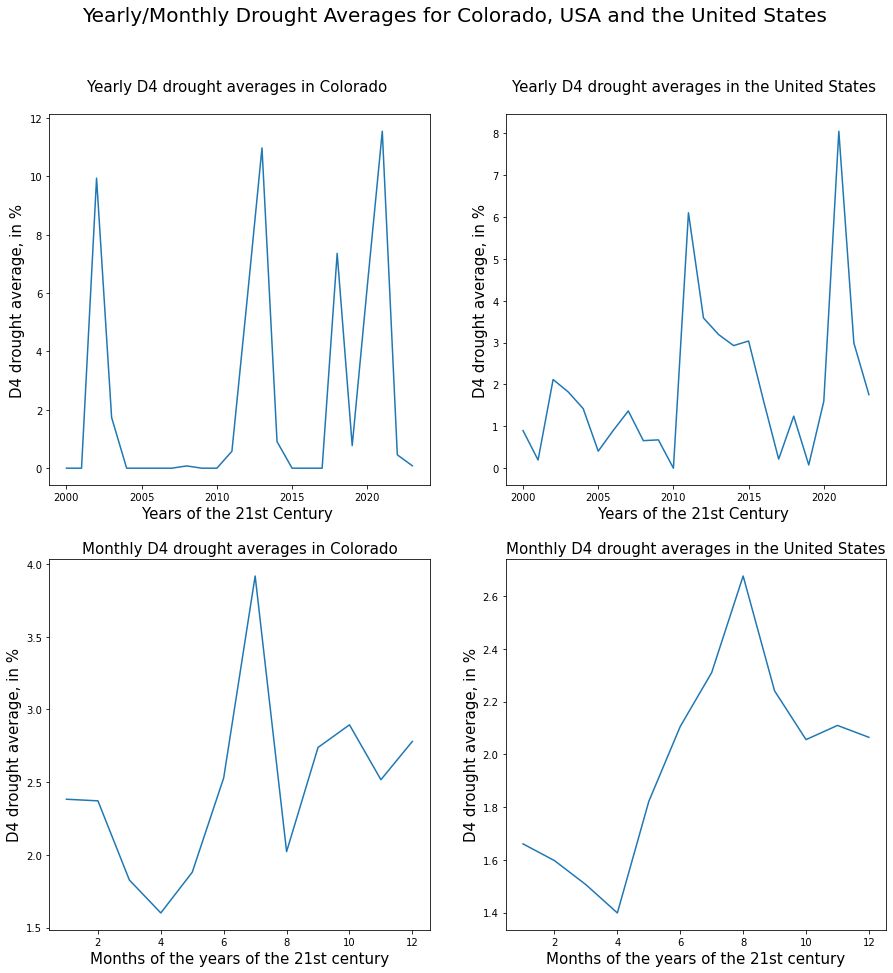

In [7]:
#Create a 2x2 subplot and a list composed of the 4 different plots by using axes.flatten(). Title the whole plot. 
fig_f, axes = plt.subplots(2,2, figsize = (15,15))
[ax1,ax2,ax3,ax4] = axes.flatten()
fig_f.suptitle('Yearly/Monthly Drought Averages for Colorado, USA and the United States', fontsize = 20)

#Make a new column in the Colorado dataframe by retrieving the datetime year entries of the index. 
drought_data_CO['year'] = drought_data_CO.index.year
#Group the Colorado data by the year column and take the mean of the D4 drought values. Plot them
ax1.plot(drought_data_CO.groupby(['year']).mean()['D4'])
# Set axes labels and a title for the subplot
ax1.set_title('Yearly D4 drought averages in Colorado \n', fontsize = 15)
ax1.set_xlabel('Years of the 21st Century \n', fontsize = 15)
ax1.set_ylabel('D4 drought average, in %', fontsize = 15)

#Make a new column in the Colorado dataframe by retrieving the datetime month entries of the index. 
drought_data_CO['month'] = drought_data_CO.index.month
#Group the Colorado data by the month column and take the mean of the D4 drought values. Plot them
ax3.plot(drought_data_CO.groupby(['month']).mean()['D4'])
# Set axes labels and a title for the subplot
ax3.set_title('Monthly D4 drought averages in Colorado', fontsize = 15)
ax3.set_xlabel('Months of the years of the 21st century', fontsize = 15)
ax3.set_ylabel('D4 drought average, in %', fontsize = 15)

#Make a new column in the United States dataframe by retrieving the datetime year entries of the index. 
drought_data_US['year'] = drought_data_US.index.year
#Group the U.S. data by the year column and take the mean of the D4 drought values. Plot them
ax2.plot(drought_data_US.groupby(['year']).mean()['D4'])
# Set axes labels and a title for the subplot
ax2.set_title('Yearly D4 drought averages in the United States \n', fontsize = 15)
ax2.set_xlabel('Years of the 21st Century \n', fontsize = 15)
ax2.set_ylabel('D4 drought average, in %', fontsize = 15)

#Make a new column in the United States dataframe by retrieving the datetime month entries of the index. 
drought_data_US['month'] = drought_data_US.index.month 
#Group the U.S. data by the month column and take the mean of the D4 drought values. Plot them
ax4.plot(drought_data_US.groupby(['month']).mean()['D4'])
# Set axes labels and a title for the subplot
ax4.set_title('Monthly D4 drought averages in the United States', fontsize = 15)
ax4.set_xlabel('Months of the years of the 21st century', fontsize = 15)
ax4.set_ylabel('D4 drought average, in %', fontsize = 15)

plt.show()

### Notes/Observations

#### The same yearly peaks of drought observed in the Time series plots for the U.S./Colorado can be seen here. However, the wider duration of the later peaks from figure 1 can be seen to yield higher yearly average D4 drought compared to the one in 2002, particularly for Colorado. Despite 2012 achieving the worst drought peak out of all years, it did not make for highest average drought, which can be attributed to 2020-2021. 

#### Monthly Drought in the U.S. and Colorado during the 21st century are at their lowest points during April. Colorado drought is about 1.4% higher on a monthly basis and usually peaks around July. U.S. Drought reaches its peak later during August/September. 

## Code for Slide 11 Drought Summary Statistics 

In [11]:
#Statistics USA

print('D4 drought averages in the US during the 2000s,2010s, and 2020s')
#Create a column in the US dataframe based off the index date
drought_data_US['date'] = drought_data_US.index
#Make a dataframe that only contains the dates from 2000-2010
drought_data_US_2000s = drought_data_US[drought_data_US['date'] < pd.to_datetime('2009-12-30')]
#Print out the mean of the D4 drought of this dataframe
print(drought_data_US_2000s['D4'].mean())

#Make an inital dataframe that only contains the dates from 2000-2010
drought_data_US_2010s1 = drought_data_US[drought_data_US['date'] < pd.to_datetime('2019-12-30')]
#Make a final dataframe containing only dates from 2010-2020 by filtering out the >2020 dates from the initial dataframe
drought_data_US_2010s2 = drought_data_US_2010s1[drought_data_US_2010s1['date'] > pd.to_datetime('2009-12-30')]
#Print out the mean of the D4 drought of this dataframe
print(drought_data_US_2010s2['D4'].mean())

#Create a dataframe that only contains dates >2020 from the U.S. drought dataframe
drought_data_US_2020s = drought_data_US[drought_data_US['date'] > pd.to_datetime('2019-12-30')]
#Print out the D4 drought average of this dataframe
print(drought_data_US_2020s['D4'].mean(),'\n')


#Statistics Co

print('D4 drought averages in Colorado during the 2000s,2010s, and 2020s')
#Create a column in the CO dataframe based off the index date
drought_data_CO['date'] = drought_data_CO.index
#Make a dataframe that only contains the dates from 2000-2010
drought_data_Co_2000s = drought_data_CO[drought_data_CO['date'] < pd.to_datetime('2009-12-30')]
#Print out the mean of the D4 drought of this dataframe
print(drought_data_Co_2000s['D4'].mean())

#Make an inital dataframe that only contains the dates from 2000-2010
drought_data_CO_2010s1 = drought_data_CO[drought_data_CO['date']< pd.to_datetime('2019-12-30')]
#Make a final dataframe containing only dates from 2010-2020 by filtering out the >2020 dates from the initial dataframe
drought_data_CO_2010s2 = drought_data_CO[drought_data_CO['date']> pd.to_datetime('2009-12-30')]
#Print out the mean of the D4 drought of this dataframe
print(drought_data_CO_2010s2['D4'].mean())

#Create a dataframe that only contains dates >2020 from the CO drought dataframe
drought_data_CO_2020s = drought_data_CO[drought_data_CO['date'] > pd.to_datetime('2019-12-30')]
#Print out the D4 drought average of this dataframe
print(drought_data_CO_2020s['D4'].mean(),'\n')

D4 drought averages in the US during the 2000s,2010s, and 2020s
1.0506019417475732
2.2013435700575776
4.068666666666666 

D4 drought averages in Colorado during the 2000s,2010s, and 2020s
1.206368932038835
3.3945481049562733
5.748242424242427 



### Notes/Observations

### The Statstics reflect a doubling trend of D4 drought throughout the 2002s, 2010s, and 2020s. The data for the 2020s is tentative however, as only 3 years worth of data is available for that particular decade. 

## Final notes/comments

### During the next stage of this project, we will analyze wildfire data, and see how it correlates to this drought data for the United States and Colorado. 